In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
def create_heatmap(dataframe, title, filename, target_column):
    # Pivot the DataFrame for the heatmap
    # Assuming that the columns 'feature', 'value', and 'scaled_value' exist in the dataframe
    heatmap_data = dataframe.pivot(index='feature', columns='value', values='scaled_value')

    # Sort the pivot data by one of the columns for visual hierarchy in the heatmap
    sorted_heatmap_data = heatmap_data.sort_values(by=target_column, ascending=False)

    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(sorted_heatmap_data, annot=True, cmap='coolwarm_r', fmt='.2f')

    # Customize the plot
    plt.title(title)
    plt.ylabel('DLE Clusters')
    plt.xlabel('')

    # Save and show the plot
    plt.tight_layout() # Ensure everything fits without overlapping
    plt.savefig(filename, dpi=600, bbox_inches='tight')
    plt.show()

In [12]:
def scale_values(dataframe):
    # Scale the values in the dataframe
    # Assuming that the columns 'feature' and 'value' exist in the dataframe
    
    dataframe['scaled_value'] = -np.log(dataframe['qval']) * np.sign(dataframe['coef'])
    
    dataframe = dataframe.sort_values(by='scaled_value')

    return dataframe

In [14]:
df = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\DRA008156\\2_groups\\clustered_NoNorm\\all_results.tsv', sep='\t')

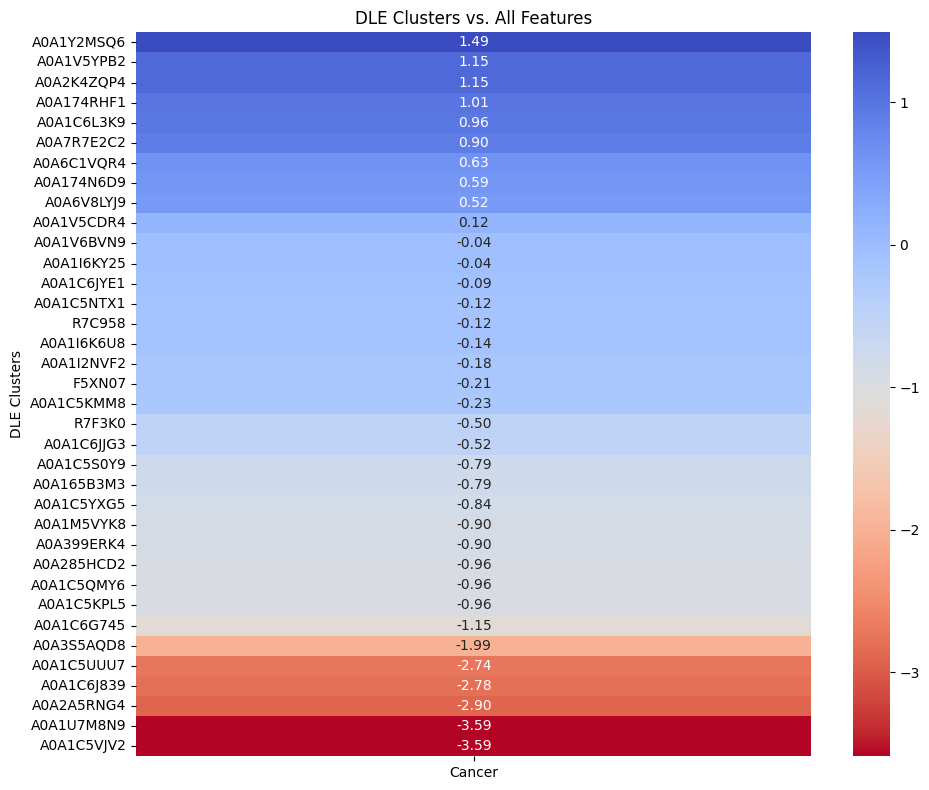

In [20]:
df = scale_values(df)

create_heatmap(df, 'DLE Clusters vs. All Features', 'C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\DRA008156\\2_groups\\clustered_NoNorm\\all_results_heatmap.png', 'Cancer')

In [ ]:
df2 = pd.read_csv("C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB7774_cluster\\Maaslin2ResultsNoNorm\\all_results.tsv", sep='\t')

print(df2.head())

In [5]:
df2 = scale_values(df2)

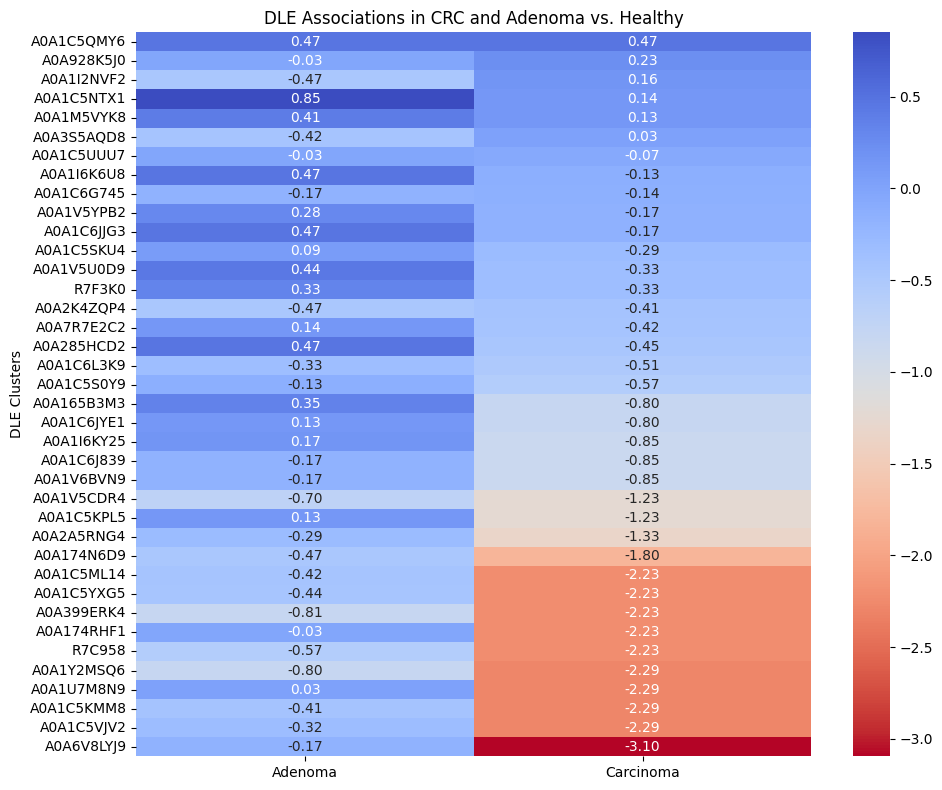

In [9]:
create_heatmap(df2, 'DLE Associations in CRC and Adenoma vs. Healthy', '../../figures/heatmap_7774.png', 'Carcinoma')